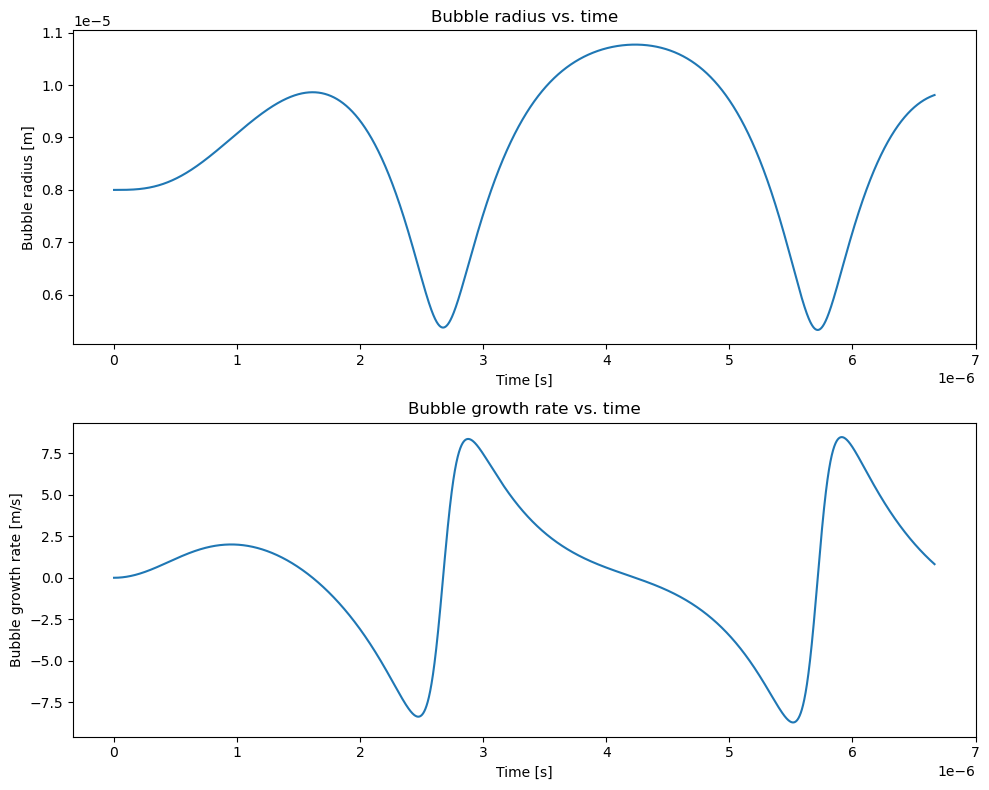

In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
p0 = 101325  # Ambient pressure [Pa]
pvap = 3539  # Saturation vapor pressure for water at 300K [Pa]
rho = 996.  # Fluid density for water at 300K [kg/m^3]
s = 0.07197  # Surface tension for water at 300K [N/m]
nu = 8.9e-4  # Fluid dynamic viscosity for water at 300K [Pa.s]
amp = 0.5 * p0
f = 300000

# Initial conditions
R0 = 8e-6  # Initial bubble radius [m]

def p_acoustic(t):
    return -amp * np.sin(2 * np.pi * f * t)

def rayleigh_plesset_with_radiation_loss(t, r):
    R = r[0]
    dR = r[1]

    p_gas = (p0 + 2 * s / R0 - pvap) * (R0 / R) ** (3 * kappa)
    p_surf = 2 * s / R
    p_liq = p_gas + pvap - p_surf
    p_ext = p0 + p_acoustic(t)

    ddR = -3 * dR ** 2 / (2 * R) + 1 / (rho * R) * (p_liq - 4 * nu * dR / R - p_ext)

    return [dR, ddR]

# Time span
t_span = (0, 2./f)
t_eval = np.linspace(t_span[0], t_span[1], 200000)

# Solve the Rayleigh-Plesset equation with radiation loss
solution = solve_ivp(rayleigh_plesset_with_radiation_loss, t_span, [R0, 0], t_eval=t_eval, rtol=1e-6, atol=1e-9, method='BDF')

# Extract the solution
t = solution.t
R = solution.y[0]
dRdt = solution.y[1]

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(t, R)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Bubble radius [m]')
ax[0].set_title('Bubble radius vs. time')

ax[1].plot(t, dRdt)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bubble growth rate [m/s]')
ax[1].set_title('Bubble growth rate vs. time')

plt.tight_layout()
plt.show()


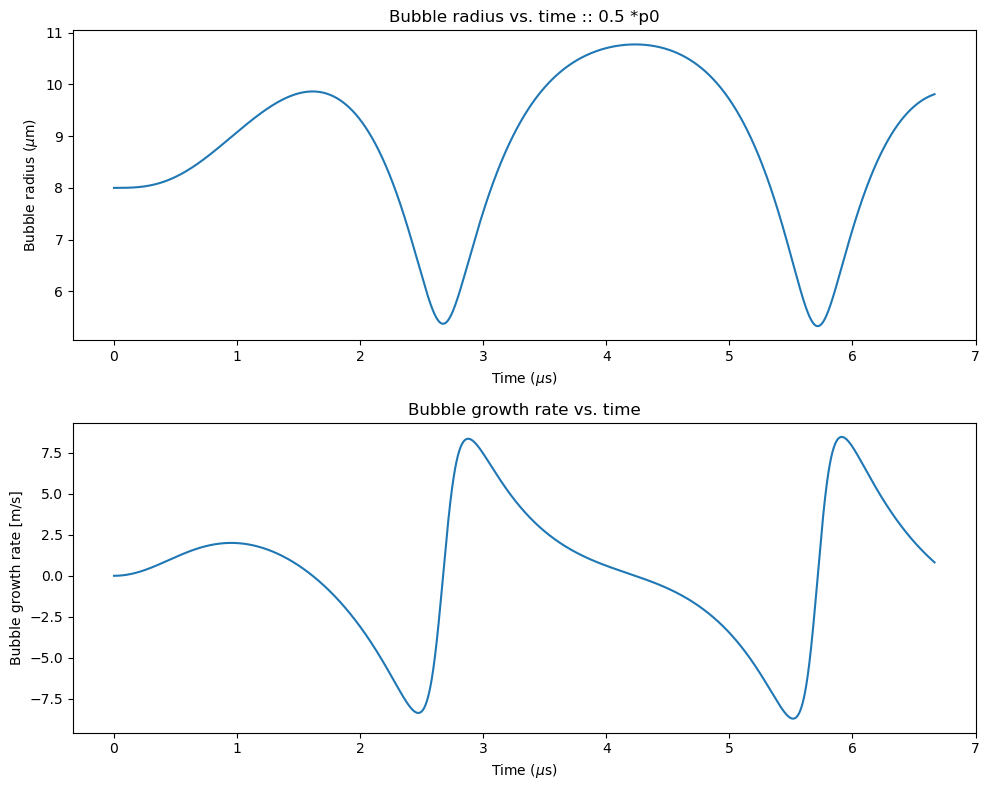

In [35]:
# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(t * 1e6, R * 1e6)  # Convert time to microseconds and radius to micrometers
ax[0].set_xlabel('Time ($\mu$s)')
ax[0].set_ylabel('Bubble radius ($\mu$m)')
ax[0].set_title(f'Bubble radius vs. time :: {amp /p0 } *p0')

ax[1].plot(t * 1e6, dRdt)  # Convert time to microseconds
ax[1].set_xlabel('Time ($\mu$s)')
ax[1].set_ylabel('Bubble growth rate [m/s]')
ax[1].set_title('Bubble growth rate vs. time')

plt.tight_layout()
plt.show()

c:\Users\Berry\.conda\envs\dmn\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


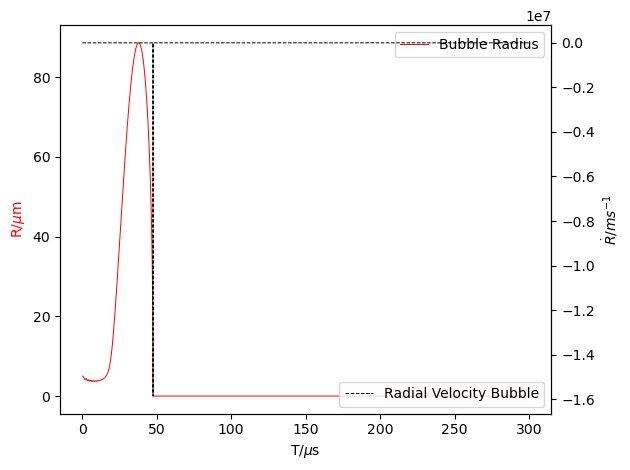

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# define equations
def equation(y0, t, R, rho, sigma, miu, P_g, P_0, R_0, k):
    R, u = y0
    return u, (P_g-P_0-70000*np.sin(2*np.pi*31700*t)-2*sigma/R-4*miu*u/R+(2*sigma/R_0+P_0-P_g)*(R_0/R)**(3*k))/(R*rho)-3*u**2/(2*R)

# initial conditions
R_0 = 0.000005
u_0 = 0

# parameters
rho = 1000
sigma = 0.0728
miu = 8.9*10**(-4)
P_g = 2330
P_0 = 10000
k = 1.33

time = np.arange(0, 0.0003, 0.000000025)

# Note that the arguments for the odeint function have been changed
R_1 = odeint(equation, [R_0, u_0], time, args=(R_0, rho, sigma, miu, P_g, P_0, R_0, k))

V = R_1[:,1]
R = R_1[:,0]*10**6
mtimes = time*10**6

#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("T/$\mu$s")
ax1.set_ylabel("R/$\mu$m", color = "red")
ax1.plot(mtimes, R, linewidth = 0.7, label = "Bubble Radius", color="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$\dot{R}$/$ms^{-1}$")  # we already handled the x-label with ax1
ax2.plot(mtimes, V, linestyle = "dashed", color = "black", linewidth=0.7, label = "Radial Velocity Bubble")
ax1.legend()
ax2.legend(loc="lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [5]:
t_span = (0, 0.4e-4)